# <center> PHY 102 Lab - RC Circuits</center>
### <center>University of Mount Union</center>

## Cell 1

Run this code once, then move on.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.widgets import Slider
from scipy.integrate import odeint
# use widget on the online binder; notebook
# may work better on a local machine:
#%matplotlib notebook
%matplotlib widget


def update(i):
    # Used to update animated figure
    line_Q.set_data(tpoints[:i],Qpoints[:i])
    line_I.set_data(tpoints[:i],Ipoints[:i])
    fig.canvas.draw_idle()
    


## Cell 2: Circuit for Steps 1-3


<IPython.core.display.Javascript object>


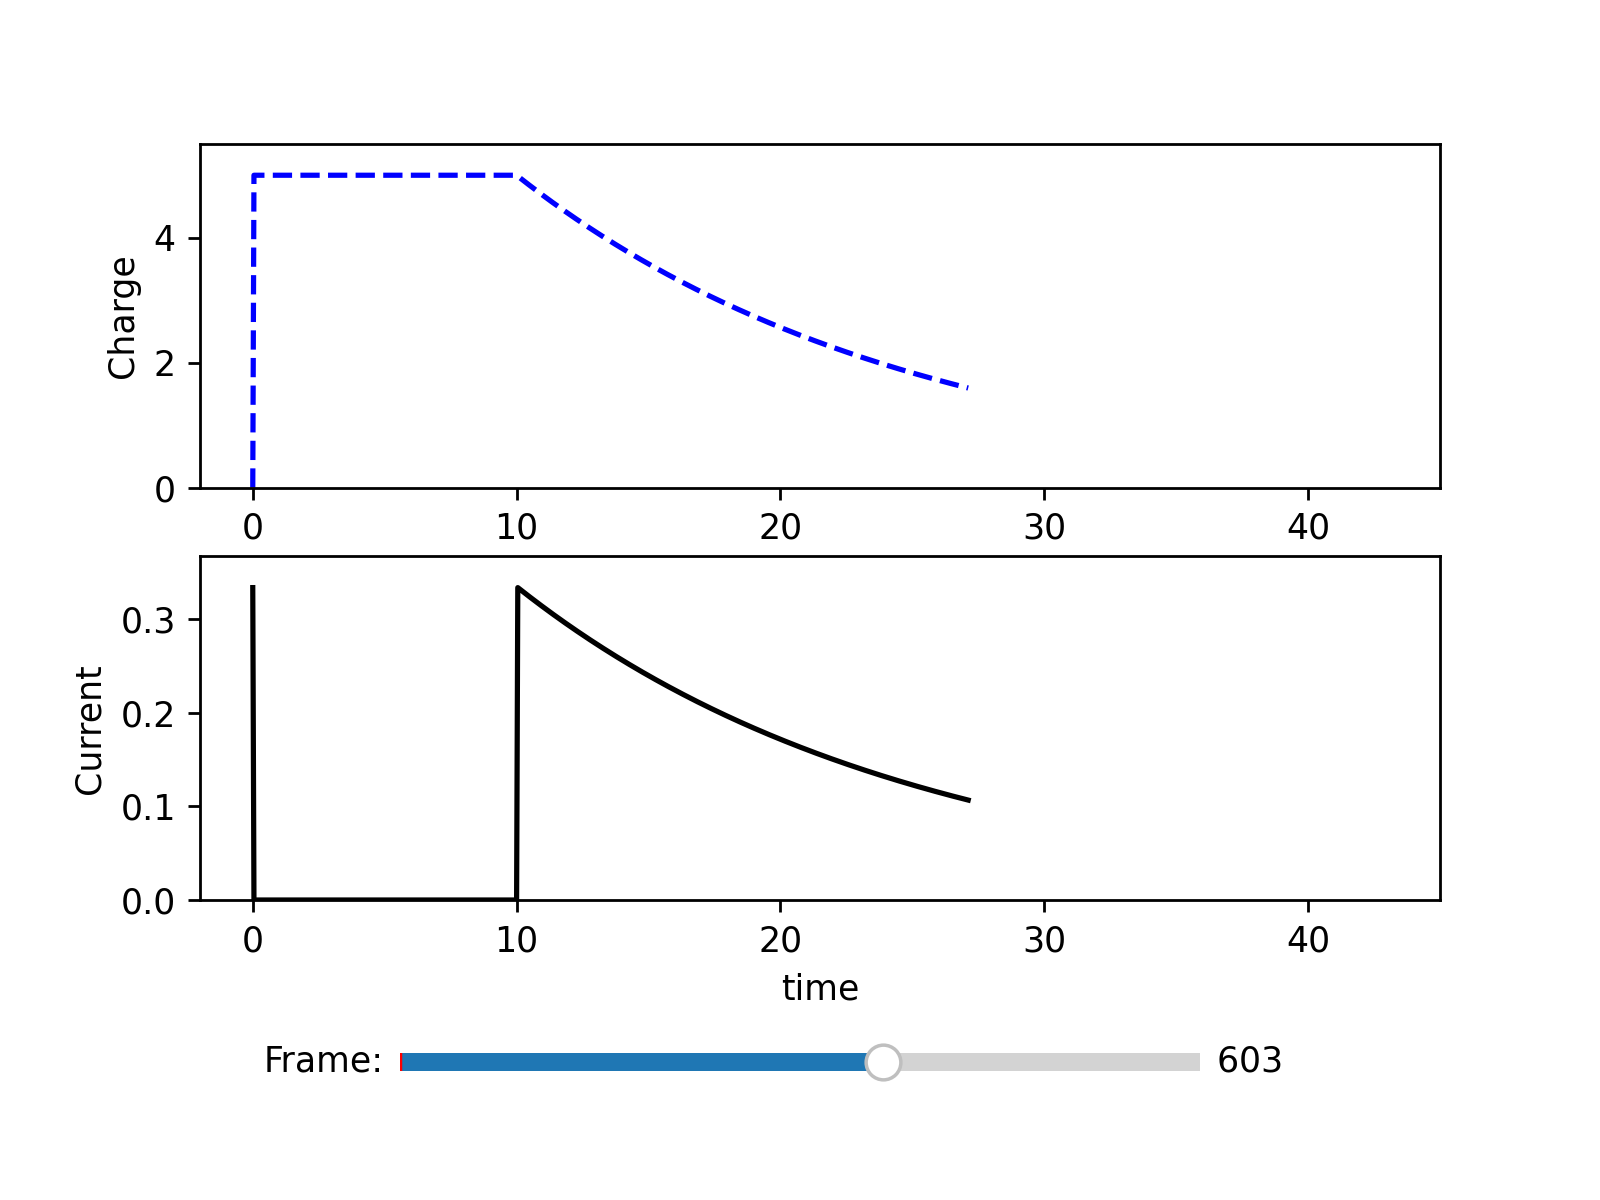

In [3]:
R = 3         # Default: 1 (resistor adjacent to cap)
C = 5         # Default: 1 (capacitance)
V0 = 0        # Default: 1 (initial potential on cap)
Vbat = 1      # Default: 1 (battery potential)



# ====================================
# Don't edit anything below this line!
# ====================================

toggle_time = 10
I0 = Vbat/R
Vc = 0
Qc = 0

switched = False

# Obtain simulation results data
tpoints = np.linspace(0,3*R*C,1000)     # time
Qpoints = [Qc]
Ipoints = [I0]

dt = tpoints[1]-tpoints[0]

for t in tpoints:
    if t < toggle_time:
        # initial charge
        Ipoints.append(0)
        Vc = Vbat
        Qpoints.append(C*Vc)
    else:
        # discharge
        Ipoints.append(Vc/R)
        Qpoints.append(Qpoints[-1]-1*Ipoints[-1]*dt)
        Vc = Qpoints[-1]/C;
        
    #Vc = min(Vbat,Qpoints[-1]/C)
    #Qpoints[-1] = C*Vc

    # Make a figure
fig = plt.figure()
ax1 = plt.subplot(211)

# Draw the charge
line_Q, = ax1.plot([],[],'b--',label='Charge')
ax1.set_xlim(-2,tpoints[-1])
ax1.set_ylim(0,1.1*np.max(Qpoints))
ax1.set_ylabel('Charge')

ax2 = plt.subplot(212)
line_I, = ax2.plot([],[],'k-',label = 'Current')
ax2.set_xlabel('time')
ax2.set_xlim(-2,tpoints[-1])
ax2.set_ylim(0,1.1*np.max(Ipoints[10:]))
ax2.set_ylabel('Current')


# adjust the main plot to make room for the slider
fig.subplots_adjust(bottom=0.25)

# Make a horizontal slider to control the max time.
axtime = fig.add_axes([0.25, 0.1, 0.5, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Frame:',
    valmin=0,
    valmax=999,
    valstep = list(range(1000)),
    valinit=0,
)

# Bind the update function to the axis
time_slider.on_changed(update)
                  
plt.show()

## Cell 3: Circuit for Steps 4-6

<IPython.core.display.Javascript object>


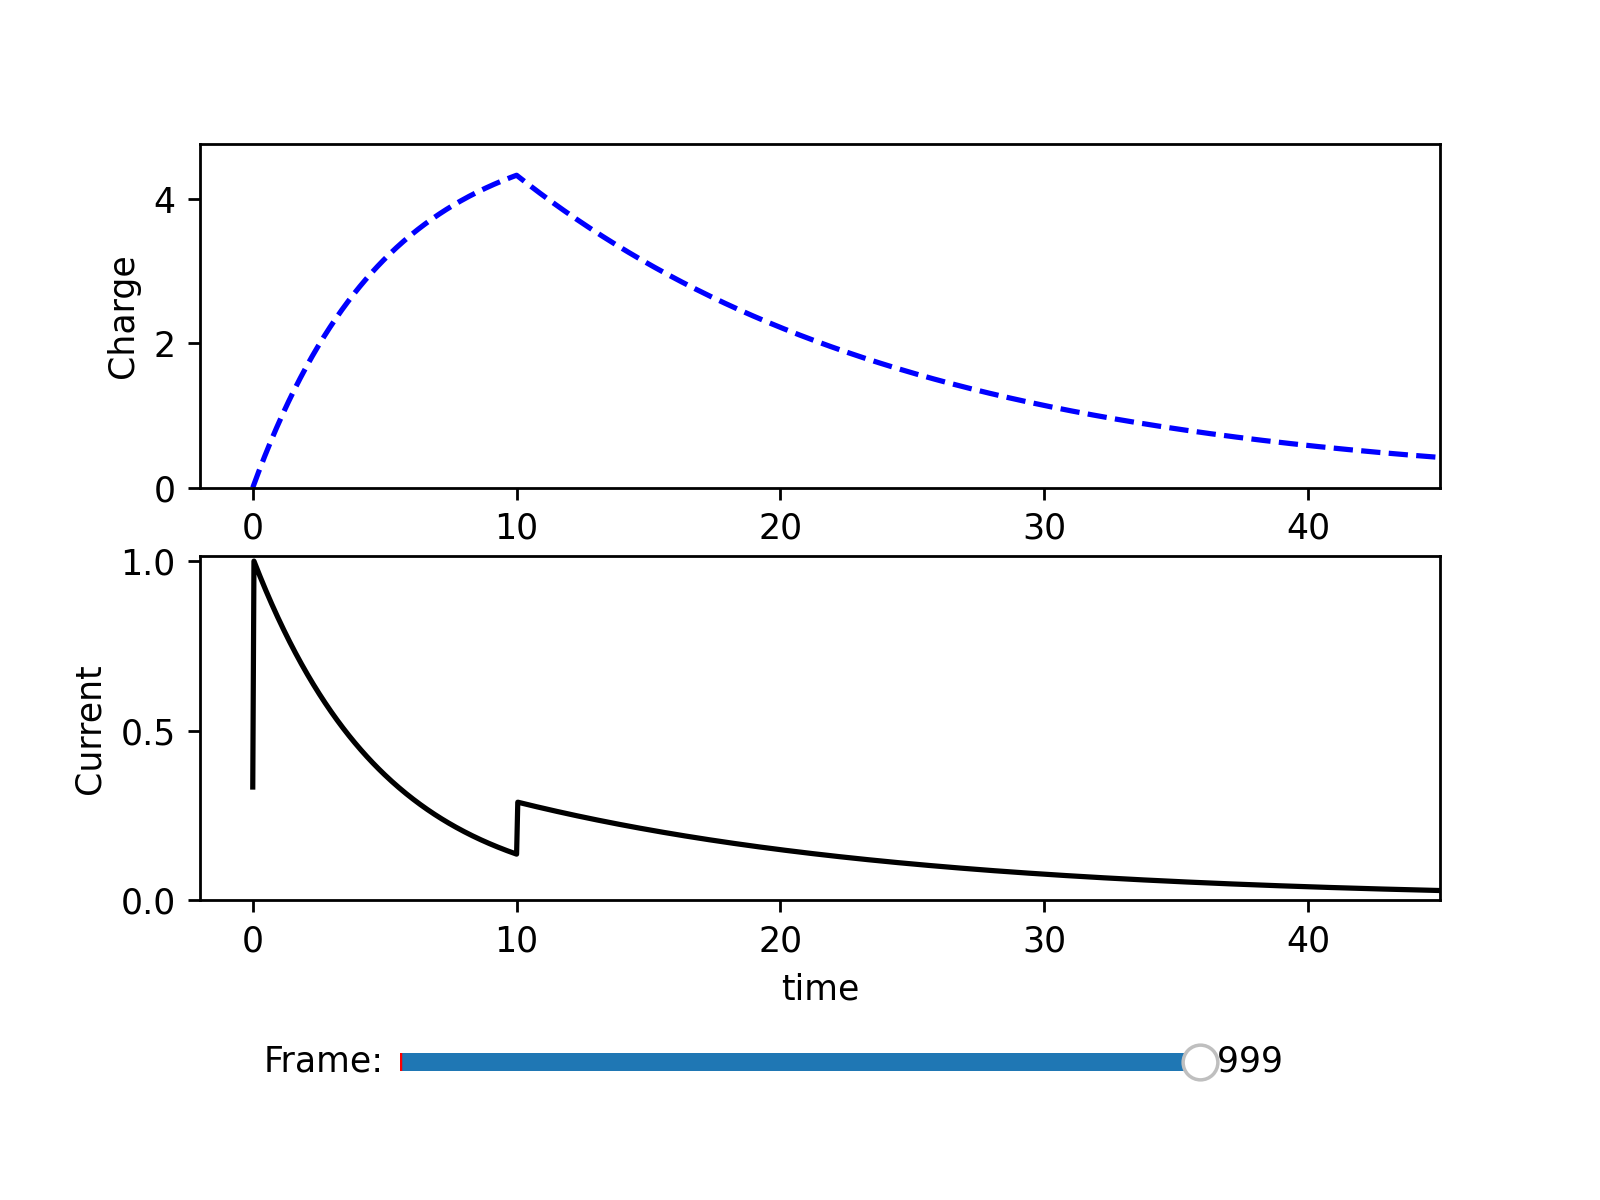

In [5]:
R = 3         # Default: 1 (resistor adjacent to cap)
C = 5         # Default: 1 (capacitance)
V0 = 0        # Default: 1 (initial potential on cap)
Vbat = 1      # Default: 1 (battery potential)
Rbat = 1      # Default: 3 (resistor battery)


# ====================================
# Don't edit anything below this line!
# ====================================

toggle_time = 10
I0 = Vbat/R
Vc = 0
Qc = 0

switched = False

# Obtain simulation results data
tpoints = np.linspace(0,3*R*C,1000)     # time
Qpoints = [Qc]
Ipoints = [I0]

dt = tpoints[1]-tpoints[0]

for t in tpoints:
    if t < toggle_time:
        # initial charge (update the line below!)
        Ipoints.append(0) 
        Qpoints.append(Qpoints[-1]+Ipoints[-1]*dt)
        Vc = Qpoints[-1]/C
    else:
        # discharge
        Ipoints.append(Vc/R)
        Qpoints.append(Qpoints[-1]-1*Ipoints[-1]*dt)
        Vc = Qpoints[-1]/C;
        
    #Vc = min(Vbat,Qpoints[-1]/C)
    #Qpoints[-1] = C*Vc

    # Make a figure
fig = plt.figure()
ax1 = plt.subplot(211)

# Draw the charge
line_Q, = ax1.plot([],[],'b--',label='Charge')
ax1.set_xlim(-2,tpoints[-1])
ax1.set_ylim(0,1.1*np.max(Qpoints))
ax1.set_ylabel('Charge')

ax2 = plt.subplot(212)
line_I, = ax2.plot([],[],'k-',label = 'Current')
ax2.set_xlabel('time')
ax2.set_xlim(-2,tpoints[-1])
ax2.set_ylim(0,1.1*np.max(Ipoints[10:]))
ax2.set_ylabel('Current')


# adjust the main plot to make room for the slider
fig.subplots_adjust(bottom=0.25)

# Make a horizontal slider to control the max time.
axtime = fig.add_axes([0.25, 0.1, 0.5, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Frame:',
    valmin=0,
    valmax=999,
    valstep = list(range(1000)),
    valinit=0,
)

# Bind the update function to the axis
time_slider.on_changed(update)
                  
plt.show()